In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
data = pd.read_excel(url)

# Inspect first few rows
print(data.head())
print(data.info())  # Check for missing values
print(data.describe())  # Get statistics

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB
None
               X1      

1- Handle Missing Values and Correlation:

Missing Values:
 X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64


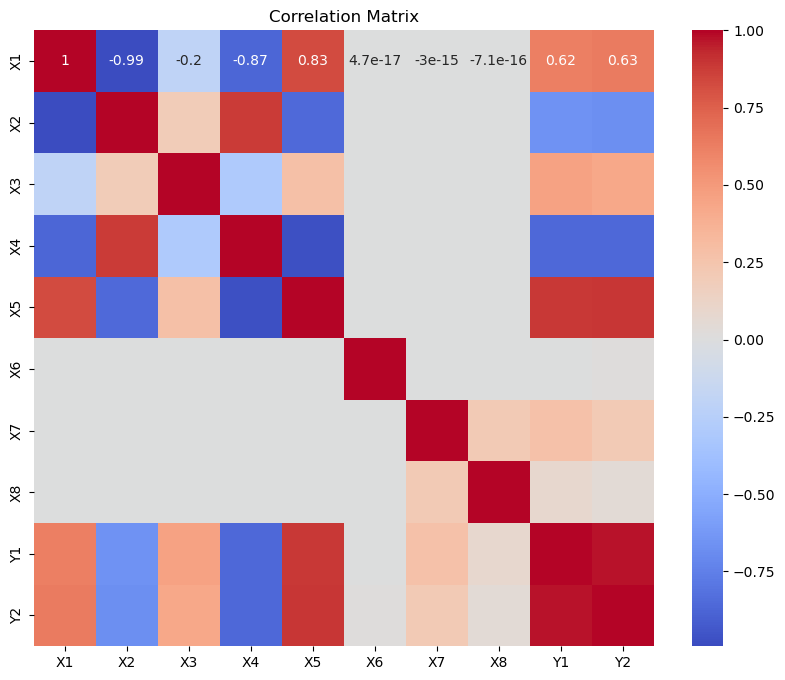

In [3]:
print("Missing Values:\n", data.isnull().sum())

# If any missing values exist, fill them (e.g., mean imputation)
data = data.fillna(data.mean())

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

2-Energy Efficiency Dataset into an 80:20 ratio for training and testing.


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
df = pd.read_excel(dataset_url)
print("Dataset Preview:")
print(df.head())
X = df.iloc[:, :-2]  
y = df['Y1']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)
print(f"Number of training samples: {X_train.shape[0]}")
print(f"Number of testing samples: {X_test.shape[0]}")



Dataset Preview:
     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
Training Data Shape: (614, 8)
Testing Data Shape: (154, 8)
Number of training samples: 614
Number of testing samples: 154


3-Train a multivairate linear regression model from scratch using numpy,pandas ,matplotlib.

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [52]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
df = pd.read_excel(url)
print("Dataset Sample:")
print(df.head())
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'] 
target = 'Y1'  
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training and Testing Sets:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
def linear_regression_scratch(X, y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    
    weights = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
    return weights

weights = linear_regression_scratch(X_train, y_train)

print("Weights (from scratch):")
print(weights)
def predict_scratch(X, weights):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    return X_b @ weights

# Predict on the test set
y_pred_scratch = predict_scratch(X_test, weights)

# Calculate Mean Squared Error and R2 Score
mse_scratch = mean_squared_error(y_test, y_pred_scratch)
r2_scratch = r2_score(y_test, y_pred_scratch)

print("Manual Linear Regression Results:")
print("Mean Squared Error (MSE):", mse_scratch)
print("R2 Score:", r2_scratch)


Dataset Sample:
     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
Training and Testing Sets:
X_train shape: (614, 8)
X_test shape: (154, 8)
Weights (from scratch):
[-2.24050721e+14  1.45935912e+14  1.55091748e+11  1.24984647e+10
  2.75030437e+10  5.23609528e+00 -3.15918688e-02  2.02860108e+01
  2.13458715e-01]
Manual Linear Regression Results:
Mean Squared Error (MSE): 4.680725826662243e+24
R2 Score: -4.490662605721778e+22


In [53]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

# Calculate metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Sklearn Linear Regression Results:")
print("Mean Squared Error (MSE):", mse_lr)
print("R2 Score:", r2_lr)

Sklearn Linear Regression Results:
Mean Squared Error (MSE): 9.1591333894591
R2 Score: 0.9121277781779598


In [54]:
ridge_model = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge_model.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Calculate metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Results:")
print("Mean Squared Error (MSE):", mse_ridge)
print("R2 Score:", r2_ridge)

Ridge Regression Results:
Mean Squared Error (MSE): 9.653457869919276
R2 Score: 0.9073852563091275


In [55]:
lasso_model = Lasso(alpha=0.1)  # alpha is the regularization strength
lasso_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Calculate metrics
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression Results:")
print("Mean Squared Error (MSE):", mse_lasso)
print("R2 Score:", r2_lasso)


Lasso Regression Results:
Mean Squared Error (MSE): 10.08905322937284
R2 Score: 0.9032061783960788


In [56]:
print("\nModel Comparison:")
print(f"Manual Linear Regression - MSE: {mse_scratch:.4f}, R2: {r2_scratch:.4f}")
print(f"Sklearn Linear Regression - MSE: {mse_lr:.4f}, R2: {r2_lr:.4f}")
print(f"Ridge Regression - MSE: {mse_ridge:.4f}, R2: {r2_ridge:.4f}")
print(f"Lasso Regression - MSE: {mse_lasso:.4f}, R2: {r2_lasso:.4f}")


Model Comparison:
Manual Linear Regression - MSE: 4680725826662242824749056.0000, R2: -44906626057217784152064.0000
Sklearn Linear Regression - MSE: 9.1591, R2: 0.9121
Ridge Regression - MSE: 9.6535, R2: 0.9074
Lasso Regression - MSE: 10.0891, R2: 0.9032


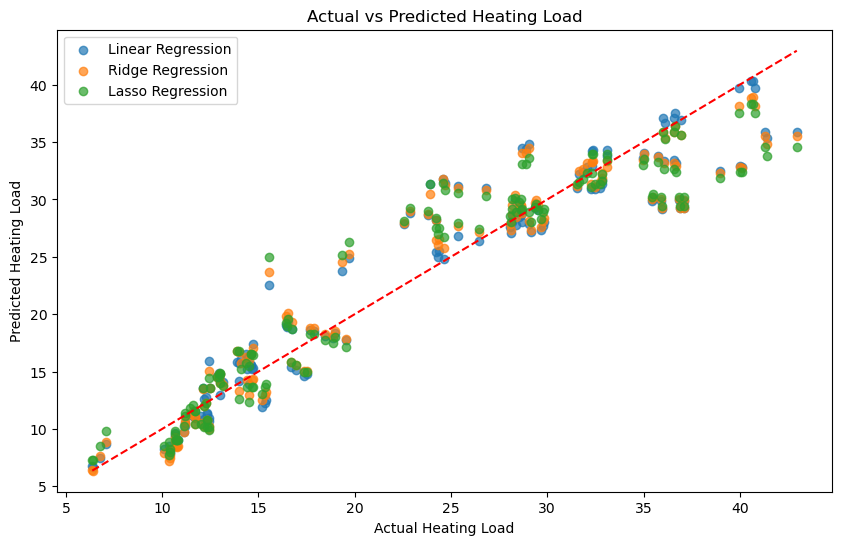

In [57]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.7)
plt.scatter(y_test, y_pred_ridge, label='Ridge Regression', alpha=0.7)
plt.scatter(y_test, y_pred_lasso, label='Lasso Regression', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.title("Actual vs Predicted Heating Load")
plt.legend()
plt.show()

4-Energy Efficiency Datase.comparing actual and sklearn graph

In [58]:
import pandas as pd           
import numpy as np            
import matplotlib.pyplot as plt  
import seaborn as sns        
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression     
from sklearn.metrics import mean_squared_error, r2_score  
import warnings
warnings.filterwarnings('ignore')
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
data = pd.read_excel(url)
print("Dataset Preview:")
data.head()


Dataset Preview:


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
data.columns = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
                'Overall_Height', 'Orientation', 'Glazing_Area', 
                'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load']

print("\nDataset Information:")
data.info()
print("\nSummary Statistics:")
data.describe()
X = data[['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
          'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution']]

y = data['Heating_Load']  


print(f"Number of samples: {X.shape[0]}, Number of features: {X.shape[1]}")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)
class ManualLinearRegression:
    def __init__(self):
        self.coefficients = None
        self.intercept = None

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X] 
        theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.intercept = theta[0]
        self.coefficients = theta[1:]

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return X.dot(np.r_[self.intercept, self.coefficients])

# Train manual model
manual_model = ManualLinearRegression()
manual_model.fit(X_train, y_train)

# Predictions
y_pred_manual = manual_model.predict(X_test)


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB

Summary Statistics:
Number of samples: 768, Number of features: 8
Training set size: (614, 8)
Testing set size: (154, 8)


In [66]:
sklearn_model = LinearRegression()
sklearn_model.fit(X_train, y_train)
y_pred_sklearn = sklearn_model.predict(X_test)
from math import sqrt

def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = sqrt(mse)
    print(f"{model_name} Performance:")
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print()

# Evaluate Manual Model
evaluate_model(y_test, y_pred_manual, "Manual Linear Regression")

# Evaluate Sklearn Model
evaluate_model(y_test, y_pred_sklearn, "Sklearn Linear Regression")



Manual Linear Regression Performance:
R² Score: -44906626057217784152064.0000
Mean Squared Error (MSE): 4680725826662242824749056.0000
Root Mean Squared Error (RMSE): 2163498515521.1553

Sklearn Linear Regression Performance:
R² Score: 0.9121
Mean Squared Error (MSE): 9.1591
Root Mean Squared Error (RMSE): 3.0264



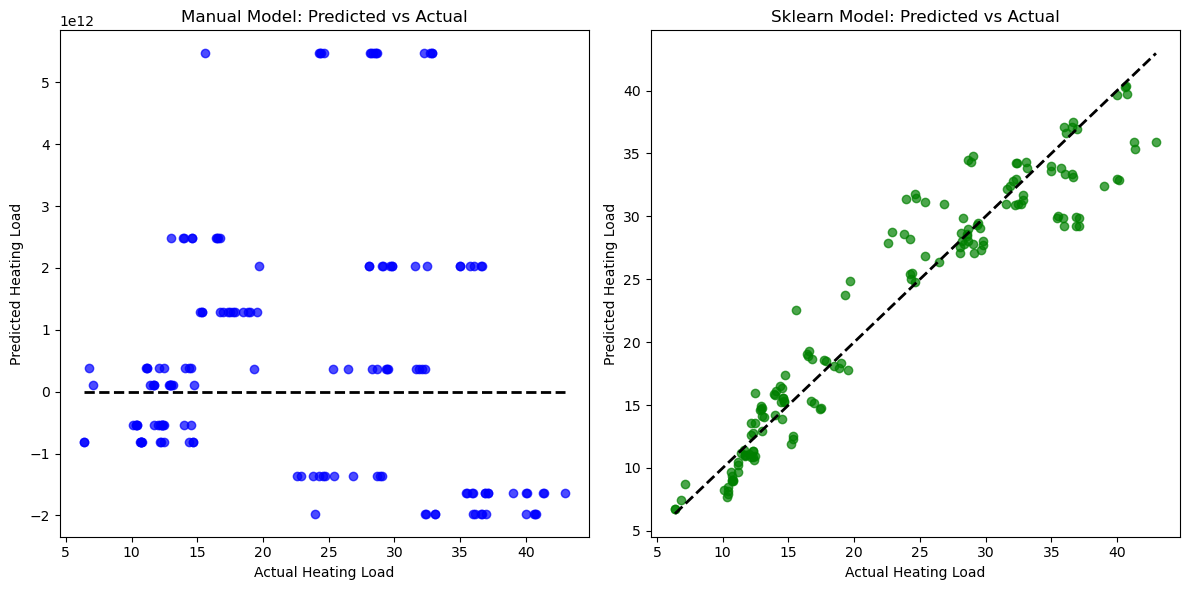

In [67]:
plt.figure(figsize=(12, 6))

# Manual Model
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_manual, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.title("Manual Model: Predicted vs Actual")

# Sklearn Model
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_sklearn, color='green', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.title("Sklearn Model: Predicted vs Actual")

plt.tight_layout()
plt.show()

5- Energy Efficiency Improvement Suggestions

In [68]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': sklearn_model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("Feature Importance (from Sklearn Linear Regression):")
print(coefficients)

Feature Importance (from Sklearn Linear Regression):
                     Feature   Coefficient
1               Surface_Area  1.103078e+11
6               Glazing_Area  2.014144e+01
4             Overall_Height  4.120392e+00
7  Glazing_Area_Distribution  2.113307e-01
5                Orientation -3.265578e-02
0       Relative_Compactness -6.209089e+01
2                  Wall_Area -1.103078e+11
3                  Roof_Area -2.206156e+11
